# EXAMPLE 01

In [55]:
#import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#load data set
data_1= sns.load_dataset("titanic") #This is a built in data set in seaborn library

### Step 01 _ check the shape of the data set

In [56]:
data_1.shape # rows, columns  in data set 1

(891, 15)

### Step 02 _ check the data types of the columns or data info

In [57]:
data_1.info() # data types of each column in data set 1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


### Step 03 _ check the missing Values in the data set 

In [58]:
data_1.isnull().sum() # check for missing values in data set 1

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
# cheak for missing values in the data (NaN or Null)  with percentage
data_1.isnull().sum() / data_1.shape[0]*100

# if missing values are more than 50% then drop the column  its not useful for analysis 
# (in next step we will deal with missing data )

### Step 04 _ Dealing with missing values 

In [59]:
# in data_1 we have missing values in age(19.865320% ), deck (77.216611%) , embarked (0.224467%)  and embark_town (0.224467%) columns

# first drop deck coloumn because it has more than 50% missing values
data_1.drop('deck', axis=1, inplace=True)

# second fill missing values in age column with mean value
data_1['age'].fillna(data_1['age'].mean(), inplace=True)

#third fill missing values in embarked column with mode value
data_1['embarked'].fillna(data_1['embarked'].mode()[0], inplace=True)

#fourth fill missing values in embarked_town column with mode value
data_1['embark_town'].fillna(data_1['embark_town'].mode()[0], inplace=True)

# In Last check if there is any missing values in data_1 
data_1.isnull().sum() 

# No missing values in data_1


survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

### Step 04 _ check the statistical summary of the data set 

In [60]:
data_1.describe() # summary of data set 1

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [61]:
#cheak value count of the specific column in data set (if you want)
data_1["class"].value_counts()

Third     491
First     216
Second    184
Name: class, dtype: int64

### Step 05 _ check the unique values in data set 

In [ ]:
# cheak the unique values in the data set/column (if you want)
data_1["class"].unique()

In [ ]:
# cheak the perticular unique value in the data set/column (if you want)
data_1[data_1.embark_town == "Queenstown"]

### Step 06 _ check the Hypothesis of the data set (normality, linearity, homoscedasticity)

<AxesSubplot:xlabel='age', ylabel='Count'>

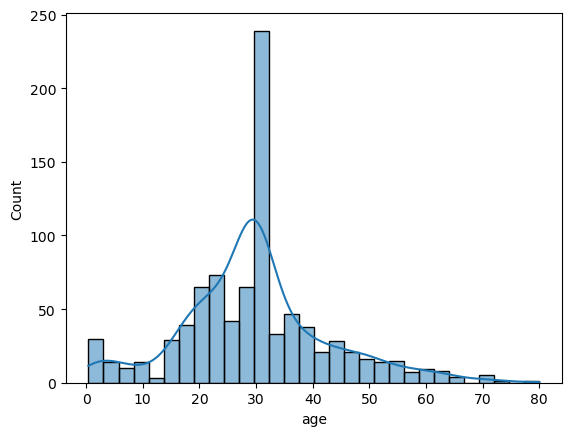

In [62]:
# cheak the normal distribution of the data set (if you want)
sns.histplot(data_1["age"], kde=True) # kde = True for density curve and kde = False for  only histogram

#####  measure its skewness and kurtosis
- skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. 
-  The skewness value can be positive or negative, or even undefined.
- kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution. That is, data sets with high kurtosis tend to have heavy tails, or outliers. 
-  Data sets with low kurtosis tend to have light tails, or lack of outliers.
-  A uniform distribution will be the extreme case.
-  A normal distribution will have a kurtosis of 3.

In [65]:
# cheak the normal distribution of the data set (if you want)
#skewness and kurtosis
data_1["age"].skew() # positive skewness
data_1["age"].kurt() # positive kurtosis
print ("Skewness: %f" % data_1["age"].skew(), "Kurtosis: %f" % data_1["age"].kurt()) 

Skewness: 0.434488 Kurtosis: 0.966279


In [66]:
# aggreate the data set (if you want)
data_1["age"].agg(["skew","kurt"]) # positive skewness and positive kurtosis

skew    0.434488
kurt    0.966279
Name: age, dtype: float64

### Step 07 _ check the visualization of your data / Analysis your data 

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


<AxesSubplot:xlabel='age'>

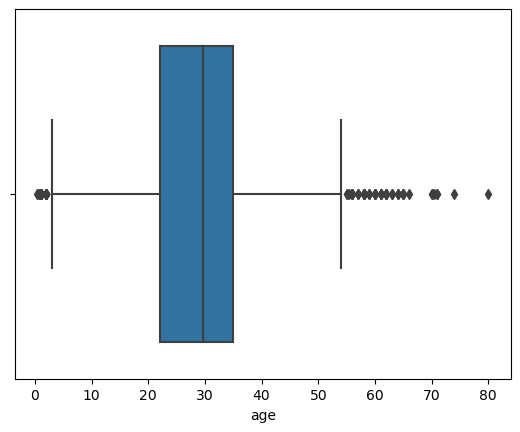

In [73]:
# box plot (if you want)
sns.boxplot(data_1["age"],orient='v') # cheak the outliers in the data set

<AxesSubplot:xlabel='age', ylabel='class'>

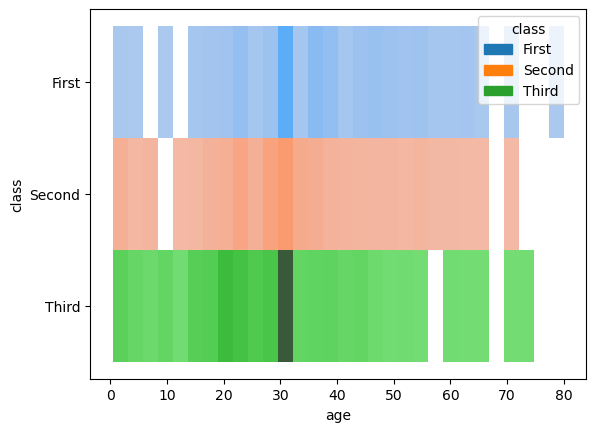

In [74]:
sns.histplot(x='age', y='class', data=data_1, hue='class')

<AxesSubplot:xlabel='age', ylabel='Count'>

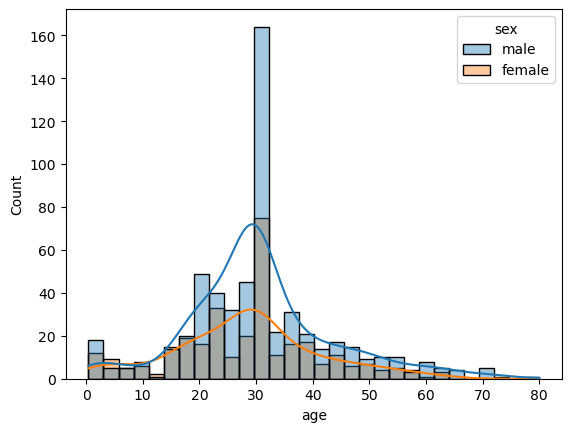

In [75]:
sns.histplot(x="age",data=data_1,hue="sex",alpha=0.4, kde=True)

### Step 08 _ correlation between data 

In [76]:
# Correlation between male age and female age
data_1["sex"].str.get_dummies().corrwith(data_1["age"])

female   -0.084153
male      0.084153
dtype: float64

In [81]:
# correlation matrix
data_1.corr().style.background_gradient(cmap='coolwarm')

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566,0.253236,0.179775
sibsp,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.253236,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.179775,-0.584471,-0.583398,-0.271832,0.404744,1.000000
